# Classifying YouTube Comments and Video Text

In [3]:
from _functions import *

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tryst\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Import and clean data
Import the data as a dataframe. Cleans the data sequentially.

### Data preprocessing
Clean the data to remove empty rows, row[0] containing the raw data to put the text into a form such that it is ready for BERT input.

In [84]:
# Import the data as dataframe
comments_df = pd.DataFrame(columns=["comment"])


current_dir = Path.cwd().parent

data_path = current_dir / "Data" / "RawData" 

for file_name in os.listdir(data_path):

    # Declare the file path
    file_path = data_path / file_name

    # Import the data
    df = pd.read_csv(file_path)
    clean_comments = clean_data(df).to_frame()
    comments_df = pd.concat([comments_df, clean_comments])

print(comments_df.shape)

(8948, 1)


### Clean the text

In [85]:
# NOTE : For importing the spacy embeddings model spacy package, run the 
#        following line in Anaconda prompt: 
#           conda install conda-forge::spacy-model-en_core_web_sm

# NOTE : We may need to go back and better handle emojis at some point. 

comments_df['cleaned_comment'] = comments_df['comment'].apply(preprocess_text)
comments_df['country'] = comments_df['cleaned_comment'].apply(extract_country)
comments_df['country'] = comments_df['country'].apply(lambda x: ['none'] if not x else x)

comments_df.head()

,comment,cleaned_comment,country
7,"It does not ""risk"" raising prices, it will ABS...",it does not risk raising prices it will absolu...,[none]
8,"Canada 🇨🇦 Your Oil , Timber and Critical Mine...",canada your oil timber and critical mineral...,[canada]
9,Stupid people gave a stupid man a stupid amoun...,stupid people gave a stupid man a stupid amoun...,[none]
10,"So punish your enemies, and then punish your f...",so punish your enemies and then punish your fr...,[none]
11,I am Canadian and i personally think we shoul...,i am canadian and i personally think we shoul...,[none]


## Sentiment Analysis Using VADER
Vader calculates the proportion of positive, negative, and neutral words in each comment and creates a compound score.

In [86]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis correctly
comments_df['sentiment_scores'] = comments_df['cleaned_comment'].apply(lambda x: analyzer.polarity_scores(x))
comments_df['compound_score'] = comments_df['sentiment_scores'].apply(lambda x: x['compound'])

print(comments_df[['cleaned_comment', 'sentiment_scores', 'compound_score']].head())

                                      cleaned_comment  \
7   it does not risk raising prices it will absolu...   
8   canada   your oil  timber and critical mineral...   
9   stupid people gave a stupid man a stupid amoun...   
10  so punish your enemies and then punish your fr...   
11  i am canadian and i personally think  we shoul...   

                                     sentiment_scores  compound_score  
7   {'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'comp...          0.2057  
8   {'neg': 0.084, 'neu': 0.836, 'pos': 0.08, 'com...         -0.0258  
9   {'neg': 0.547, 'neu': 0.453, 'pos': 0.0, 'comp...         -0.9231  
10  {'neg': 0.487, 'neu': 0.369, 'pos': 0.143, 'co...         -0.8155  
11  {'neg': 0.051, 'neu': 0.855, 'pos': 0.095, 'co...          0.4404  


## Video Transcripts

In [2]:
import os
import pandas as pd
from pathlib import Path

# Initialize an empty DataFrame
transcripts_df = pd.DataFrame(columns=["file_name", "transcript"])

# Define the data directory
current_dir = Path.cwd().parent
data_path = current_dir / "Data" / "video_transcripts"

# Iterate over each .txt file in the directory
for file_name in os.listdir(data_path):
    file_path = data_path / file_name

    # Process only .txt files
    if file_name.endswith(".txt"):
        try:
            # Read the transcript text
            with open(file_path, "r", encoding="utf-8") as file:
                transcript_text = file.read().strip()  # Read and remove extra whitespace

            # Append transcript to the DataFrame
            transcripts_df = pd.concat(
                [transcripts_df, pd.DataFrame([[file_name, transcript_text]], columns=["file_name", "transcript"])],
                ignore_index=True
            )

        except Exception as e:
            print(f"Error processing {file_name}: {e}")

# Print the shape of the final DataFrame
print(transcripts_df.shape)


(17, 2)


### Clean the transcript text

In [5]:
transcripts_df['cleaned_video'] = transcripts_df['transcript'].apply(preprocess_text)

transcripts_df.head()

,file_name,transcript,cleaned_video
0,bbc_news1_transcript.txt,There are growing fears of a major global trad...,there are growing fears of a major global trad...
1,bbc_news2_transcript.txt,I'm Helena Humphrey. Good to have you with us....,im helena humphrey good to have you with us we...
2,bbc_news_transcript.txt,We begin with the breaking news. A fresh trade...,we begin with the breaking news a fresh trade ...
3,ClearValue_transcript.txt,"In today's video, we are covering what are the...",in todays video we are covering what are the t...
4,dw_news1_transcript.txt,We begin the day with Trump's tariff threats a...,we begin the day with trumps tariff threats an...


### Sentiment Analysis using VADER

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis correctly
transcripts_df['sentiment_scores'] = transcripts_df['cleaned_video'].apply(lambda x: analyzer.polarity_scores(x))
transcripts_df['compound_score'] = transcripts_df['sentiment_scores'].apply(lambda x: x['compound'])

print(transcripts_df[['cleaned_video', 'sentiment_scores', 'compound_score']].head())

                                       cleaned_video  \
0  there are growing fears of a major global trad...   
1  im helena humphrey good to have you with us we...   
2  we begin with the breaking news a fresh trade ...   
3  in todays video we are covering what are the t...   
4  we begin the day with trumps tariff threats an...   

                                    sentiment_scores  compound_score  
0  {'neg': 0.086, 'neu': 0.815, 'pos': 0.099, 'co...          0.9055  
1  {'neg': 0.067, 'neu': 0.838, 'pos': 0.095, 'co...          0.9832  
2  {'neg': 0.089, 'neu': 0.822, 'pos': 0.088, 'co...         -0.8475  
3  {'neg': 0.059, 'neu': 0.83, 'pos': 0.111, 'com...          0.9992  
4  {'neg': 0.043, 'neu': 0.812, 'pos': 0.145, 'co...          0.9998  


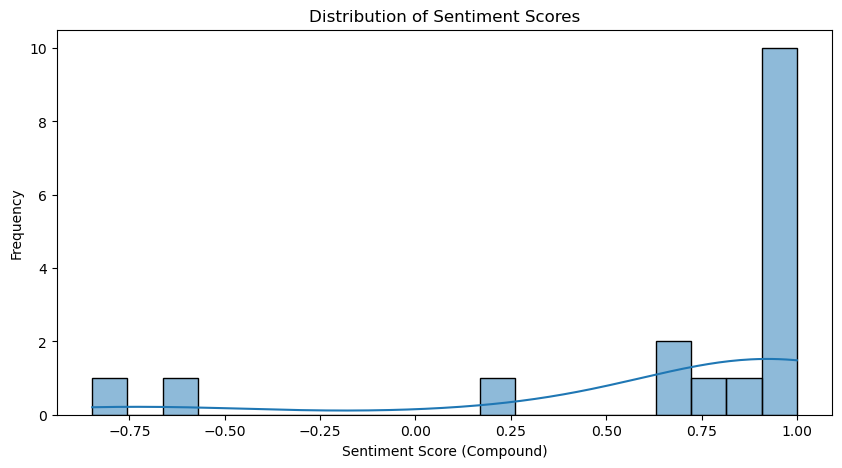

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 5))

# Histogram of compound sentiment scores
sns.histplot(transcripts_df['compound_score'], bins=20, kde=True)
plt.xlabel("Sentiment Score (Compound)")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Scores")
plt.show()


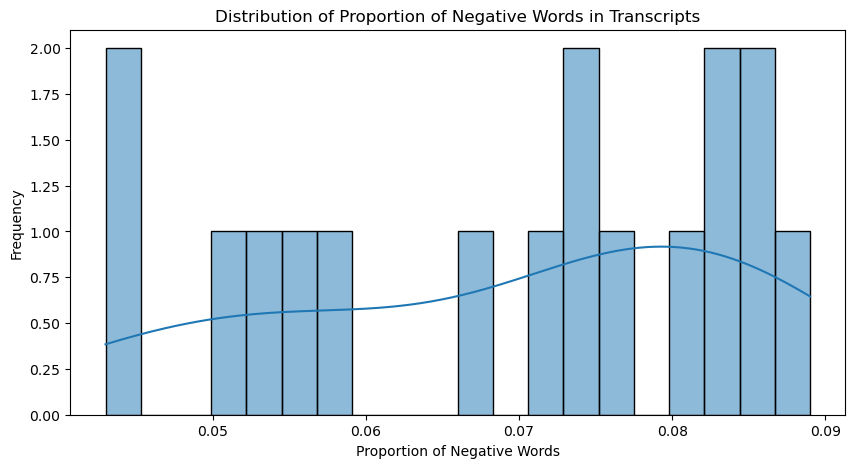

In [9]:
# Extract the proportion of negative words
transcripts_df['negative_proportion'] = transcripts_df['sentiment_scores'].apply(lambda x: x['neg'])
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 5))

# Histogram of negative word proportions
sns.histplot(transcripts_df['negative_proportion'], bins=20, kde=True)
plt.xlabel("Proportion of Negative Words")
plt.ylabel("Frequency")
plt.title("Distribution of Proportion of Negative Words in Transcripts")
plt.show()


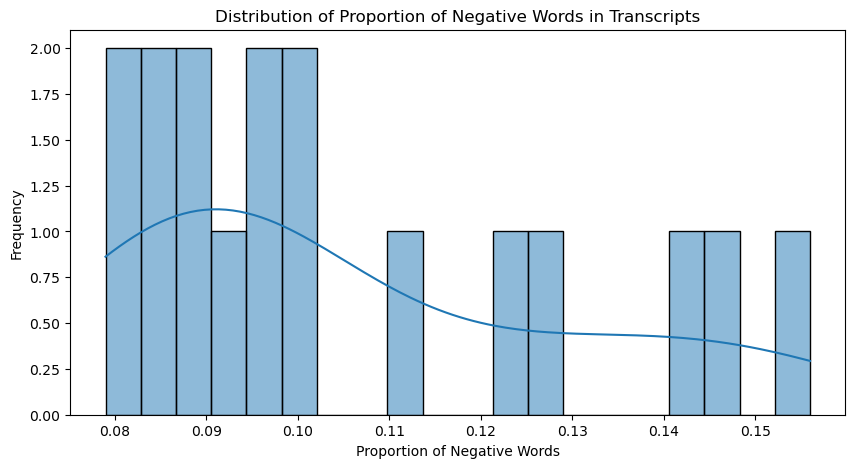

In [10]:
# Extract the proportion of negative words
transcripts_df['positive_proportion'] = transcripts_df['sentiment_scores'].apply(lambda x: x['pos'])
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 5))

# Histogram of negative word proportions
sns.histplot(transcripts_df['positive_proportion'], bins=20, kde=True)
plt.xlabel("Proportion of Negative Words")
plt.ylabel("Frequency")
plt.title("Distribution of Proportion of Negative Words in Transcripts")
plt.show()
